## EDA данных

### Table of Contents

* [Импорт данных](#Импорт-данных)
* [Описание столбцов](#Описание-столбцов)
* [Анализ и визуализация данных](#Анализ-и-визуализация-данных)
* [Кодирование данных](#Кодирование-данных)


### Импорт данных

In [ ]:
!pip3 install geopandas
!pip3 install squarify

In [401]:
import pandas as pd
import numpy as np
# Загружаем данные, полученные в результате парсинга
csv_file_path = "players.csv"
df = pd.read_csv(csv_file_path)

df

,Unnamed: 0,Name,Card Type,Nation,Club,League,Skills,W/F,W/R,Foot,...,Composure,Interceptions,Heading Acc.,Def. Awareness,Stand Tackle,Slide Tackle,Jumping,Stamina,Strength,Aggression
0,0,Erling Haaland,TOTS,Norway,Manchester City,ENG 1,4,5,H/M,Left,...,96,54,98,55,66,36,82,89,99,94
1,1,Kevin De Bruyne,TOTS,Belgium,Manchester City,ENG 1,4,5,H/H,Right,...,97,88,73,90,86,70,71,99,84,85
2,2,Kevin De Bruyne,TOTY,Belgium,Manchester City,ENG 1,4,5,H/H,Right,...,96,85,70,86,82,67,70,97,84,83
3,3,Mohamed Salah,TOTS,Egypt,Liverpool,ENG 1,5,3,H/M,Left,...,99,66,70,46,52,48,76,96,83,70
4,4,Ruben Dias,TOTS,Portugal,Manchester City,ENG 1,2,4,M/H,Right,...,99,94,96,99,98,94,87,92,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1789,Magnus Lekven,Non-Inform,Norway,Odds BK,NOR 1,2,4,M/M,Right,...,71,61,59,62,60,55,72,75,70,70
1790,1790,Arda Kizildag,Non-Inform,Turkey,Gaziantep,TUR 1,2,3,M/M,Right,...,57,63,69,68,68,62,72,65,64,62
1791,1791,Dane Scarlett,Non-Inform,England,Portsmouth,ENG 3,3,4,H/M,Right,...,54,13,64,17,16,18,76,51,56,57
1792,1792,Marvin Stefaniak,Non-Inform,Germany,FC Erzgebirge Aue,GER 3,3,4,H/M,Right,...,57,27,40,30,25,26,69,67,64,41


In [402]:
# Удаляем индекс как несущественный признак
df = df.reset_index(drop=True)
df = df.drop(['Unnamed: 0', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'], axis=1)

In [403]:
# Обзорные данные о числовых признаках
df.describe()

,Skills,W/F,Age,Rating,Price,Acceleration,Sprint Speed,Positioning,Finishing,Shot Power,...,Composure,Interceptions,Heading Acc.,Def. Awareness,Stand Tackle,Slide Tackle,Jumping,Stamina,Strength,Aggression
count,1794.000000,1794.000000,1794.000000,1794.000000,1.794000e+03,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,...,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000
mean,3.441472,3.606466,31.003344,85.458751,1.848508e+05,82.180602,82.220178,78.272575,73.992754,81.158305,...,83.406355,63.138239,73.309922,62.234114,63.243032,58.964883,76.432553,83.310479,77.406912,73.900780
std,0.886899,0.776167,11.550273,6.921013,8.456611e+05,11.368725,11.059592,16.004038,17.520936,11.686437,...,9.013678,22.052588,15.039188,21.195050,22.402668,23.170707,13.227478,9.578922,11.813313,13.935841
min,2.000000,1.000000,0.000000,64.000000,0.000000e+00,31.000000,31.000000,18.000000,17.000000,25.000000,...,45.000000,11.000000,29.000000,12.000000,12.000000,11.000000,30.000000,34.000000,30.000000,22.000000
25%,3.000000,3.000000,24.000000,84.000000,3.500000e+02,77.000000,77.000000,72.000000,63.000000,76.000000,...,80.000000,43.000000,62.000000,44.000000,42.000000,38.000000,69.000000,78.000000,70.000000,64.250000
50%,3.000000,4.000000,28.000000,87.000000,1.425000e+04,84.000000,85.000000,84.000000,80.000000,84.000000,...,85.000000,66.000000,75.000000,64.000000,66.000000,61.000000,78.000000,85.000000,79.000000,76.000000
75%,4.000000,4.000000,33.000000,90.000000,5.300000e+04,90.000000,90.000000,90.000000,87.000000,89.000000,...,89.000000,83.000000,86.000000,82.000000,84.000000,81.000000,86.000000,90.000000,86.000000,85.000000
max,5.000000,5.000000,95.000000,98.000000,1.500000e+07,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [404]:
# Поиск дубликатов
df.duplicated().sum()

24

In [405]:
# Удаление дубликатов
df = df.drop_duplicates()

### Описание столбцов

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 1793
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1770 non-null   object
 1   Card Type       1770 non-null   object
 2   Nation          1770 non-null   object
 3   Club            1770 non-null   object
 4   League          1770 non-null   object
 5   Skills          1770 non-null   int64 
 6   W/F             1770 non-null   int64 
 7   W/R             1770 non-null   object
 8   Foot            1767 non-null   object
 9   Age             1770 non-null   int64 
 10  Height          1770 non-null   object
 11  Weight          1770 non-null   object
 12  Body Type       1770 non-null   object
 13  Position        1770 non-null   object
 14  Alt. Position   1770 non-null   object
 15  Rating          1770 non-null   int64 
 16  Price           1770 non-null   int64 
 17  Acceleration    1770 non-null   int64 
 18  Sprint S

In [407]:
df.columns #посмотрим на получившиеся столбцы

Index(['Name', 'Card Type', 'Nation', 'Club', 'League', 'Skills', 'W/F', 'W/R',
       'Foot', 'Age', 'Height', 'Weight', 'Body Type', 'Position',
       'Alt. Position', 'Rating', 'Price', 'Acceleration', 'Sprint Speed',
       'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys',
       'Penalties', 'Vision', 'Crossing', 'FK. Acc.', 'Short Pass',
       'Long Pass', 'Curve', 'Agility', 'Balance', 'Reactions', 'Ball Control',
       'Dribbling', 'Composure', 'Interceptions', 'Heading Acc.',
       'Def. Awareness', 'Stand Tackle', 'Slide Tackle', 'Jumping', 'Stamina',
       'Strength', 'Aggression'],
      dtype='object')

In [408]:
''' 
'Name': Имя игрока.
'Card Type': Тип карты игрока.
'Nation': Нация игрока.
'Club': Клуб игрока.
'League': Лига игрока.
'Skills': Уровень навыков игрока.
'W/F': Уровень слабой ноги игрока.
'W/R': Работоспособность игрока в атаке/защите
'Foot': Предпочитаемая нога игрока.
'Age': Возраст игрока.
'Height': Рост игрока.
'Weight': Вес игрока.
'Body Type': Тип телосложения игрока.
'Position': Основная позиция игрока.
'Alt. Position': Альтернативная позиция игрока.
'Rating': Общий рейтинг игрока.
'Price': Цена игрока.
'Acceleration': Показатель ускорения игрока.
'Sprint Speed': Показатель скорости игрока.
'Positioning': Показатель позиционирования игрока.
'Finishing': Показатель завершения игрока.
'Shot Power': Показатель силы удара игрока.
'Long Shots': Показатель дальних ударов игрока.
'Volleys': Показатель волей игрока.
'Penalties': Показатель пенальти игрока.
'Vision': Показатель обзорности игры игрока.
'Crossing': Показатель перекладины игрока.
'FK. Acc.': Показатель точности ударов с фрик-таков игрока.
'Short Pass': Показатель коротких пасов игрока.
'Long Pass': Показатель дальних пасов игрока.
'Curve': Показатель кривых ударов игрока.
'Agility': Показатель проворства игрока.
'Balance': Показатель равновесия игрока.
'Reactions': Показатель реакций
'Ball Control': Показатель контроля мяча игрока.
'Dribbling': Показатель дриблинга игрока.
'Composure': Показатель спокойствия игрока.
'Interceptions': Показатель перехватов игрока.
'Heading Acc.': Показатель точности головы игрока.
'Def. Awareness': Показатель осведомленности в обороне игрока.
'Stand Tackle': Показатель стоячих отборов игрока.
'Slide Tackle': Показатель горизонтальных отборов игрока.
'Jumping': Показатель прыжков игрока.
'Stamina': Показатель выносливости игрока.
'Strength': Показатель силы игрока.
'Aggression': Показатель агрессии игрока.
''' 

print()

- После анализа форматов столбцов, было замечено, что столбцы "Height" и "Weight" представлены в формате object
- Эти столбцы должны иметь формат int-64 и представлять из себя числовые признаки


In [409]:
# Посмотрим, почему в столце Height данные хранятся в формате object
df.Height.head()

0     6' 5"
1    5' 11"
2    5' 11"
3     5' 9"
4     6' 2"
Name: Height, dtype: object

In [410]:
# Приведем данные в столбце Height к числовому формату в дюймах
df['Height'] = df['Height'].str.replace("'", "").str.replace('"', '')
df['Height'] = df['Height'].apply(lambda x: round((int(x.split(' ')[0]) * 12 + int(x.split(' ')[1])))).astype(int)
df.Height.head()

0    77
1    71
2    71
3    69
4    74
Name: Height, dtype: int32

In [411]:
df['Height'].unique()

array([77, 71, 69, 74, 76, 73, 68, 72, 75, 70, 66, 67, 79, 78, 65, 80, 64,
       62,  0])

In [412]:
# Посмотрим, почему в столце Weight данные хранятся в формате object
df['Weight'].head()

0    94kg
1    70kg
2    70kg
3    71kg
4    82kg
Name: Weight, dtype: object

In [413]:
# Приведем данные в столбце Weight к числовому формату
df['Weight'] = df['Weight'].str.replace("kg", '').astype(int)
df['Weight'].head()

0    94
1    70
2    70
3    71
4    82
Name: Weight, dtype: int32

In [414]:
# Создадим столбец с суммой всех стат игрока
df['Sum Of Stats'] = df.iloc[:, 17:].sum(axis = 1)

In [415]:
# Посмотрим на пропуски
df.isna().sum()

Name              0
Card Type         0
Nation            0
Club              0
League            0
Skills            0
W/F               0
W/R               0
Foot              3
Age               0
Height            0
Weight            0
Body Type         0
Position          0
Alt. Position     0
Rating            0
Price             0
Acceleration      0
Sprint Speed      0
Positioning       0
Finishing         0
Shot Power        0
Long Shots        0
Volleys           0
Penalties         0
Vision            0
Crossing          0
FK. Acc.          0
Short Pass        0
Long Pass         0
Curve             0
Agility           0
Balance           0
Reactions         0
Ball Control      0
Dribbling         0
Composure         0
Interceptions     0
Heading Acc.      0
Def. Awareness    0
Stand Tackle      0
Slide Tackle      0
Jumping           0
Stamina           0
Strength          0
Aggression        0
Sum Of Stats      0
dtype: int64

In [416]:
# Заменим рабочую ногу на самое часто встречающееся значение
df['Foot'].fillna(df['Foot'].value_counts().index[0], inplace = True)

In [417]:
# Также там есть странное значение, поменяем его
df['Foot'].replace('REight', 'Right', inplace = True)
df['Foot'].value_counts()

Right    1348
Left      422
Name: Foot, dtype: int64

In [418]:
# Посмотрим на нулевые значения
(df == 0).sum()

Name                0
Card Type           0
Nation              0
Club                0
League              0
Skills              0
W/F                 0
W/R                 0
Foot                0
Age                15
Height              3
Weight              6
Body Type           0
Position            0
Alt. Position       0
Rating              0
Price             348
Acceleration        0
Sprint Speed        0
Positioning         0
Finishing           0
Shot Power          0
Long Shots          0
Volleys             0
Penalties           0
Vision              0
Crossing            0
FK. Acc.            0
Short Pass          0
Long Pass           0
Curve               0
Agility             0
Balance             0
Reactions           0
Ball Control        0
Dribbling           0
Composure           0
Interceptions       0
Heading Acc.        0
Def. Awareness      0
Stand Tackle        0
Slide Tackle        0
Jumping             0
Stamina             0
Strength            0
Aggression

In [419]:
df[df['Age'] == 0]

,Name,Card Type,Nation,Club,League,Skills,W/F,W/R,Foot,Age,...,Interceptions,Heading Acc.,Def. Awareness,Stand Tackle,Slide Tackle,Jumping,Stamina,Strength,Aggression,Sum Of Stats
1226,Ronaldo Nazario,World Cup Icon,Brazil,Icons,ICO,5,5,M/M,Right,0,...,41,83,40,45,39,81,82,87,49,2325
1227,Zinedine Zidane,World Cup Icon,France,Icons,ICO,5,5,M/M,Right,0,...,84,86,63,75,66,74,87,87,78,2516
1292,Johan Cruyff,World Cup Icon,Netherlands,Icons,ICO,5,5,H/L,Right,0,...,43,62,40,35,39,66,82,70,71,2308
1294,Cafu,World Cup Icon,Brazil,Icons,ICO,4,4,H/M,Right,0,...,92,81,90,91,86,80,95,85,76,2348
1328,Luis Figo,World Cup Icon,Portugal,Icons,ICO,5,4,H/L,Right,0,...,41,63,33,40,37,70,86,78,76,2260
1329,Emilio Butragueno,World Cup Icon,Spain,Icons,ICO,4,5,M/L,Right,0,...,45,87,36,34,32,85,85,66,51,2247
1330,Bobby Moore,World Cup Icon,England,Icons,ICO,2,3,M/M,Right,0,...,91,87,93,93,91,83,92,82,79,2310
1381,Didier Drogba,World Cup Icon,Ivory Coast,Icons,ICO,4,5,H/H,Right,0,...,46,94,39,42,38,90,88,94,78,2263
1382,Robin van Persie,World Cup Icon,Netherlands,Icons,ICO,4,4,H/L,Left,0,...,49,79,37,43,36,68,84,77,58,2292
1383,Michael Laudrup,World Cup Icon,Denmark,Icons,ICO,4,4,M/M,Right,0,...,36,68,29,37,27,64,77,64,41,2140


In [420]:
# Руками поменяем возраст, рост и вес игроков
df.loc[df['Age'] == 0, 'Age'] = [44, 49, 74, 52, 48, 58, 80, 43, 38, 57, 50, 46, 25, 25, 26]
df.loc[df['Height'] == 0, 'Height'] = [69, 69, 71]
df.loc[df['Weight'] == 0, 'Weight'] = [86, 71, 76, 69, 69, 80]

df.Age.shape

(1770,)

In [421]:
(df['Age'] == 0).sum()

0

In [422]:
(df == 0).sum()

Name                0
Card Type           0
Nation              0
Club                0
League              0
Skills              0
W/F                 0
W/R                 0
Foot                0
Age                 0
Height              0
Weight              0
Body Type           0
Position            0
Alt. Position       0
Rating              0
Price             348
Acceleration        0
Sprint Speed        0
Positioning         0
Finishing           0
Shot Power          0
Long Shots          0
Volleys             0
Penalties           0
Vision              0
Crossing            0
FK. Acc.            0
Short Pass          0
Long Pass           0
Curve               0
Agility             0
Balance             0
Reactions           0
Ball Control        0
Dribbling           0
Composure           0
Interceptions       0
Heading Acc.        0
Def. Awareness      0
Stand Tackle        0
Slide Tackle        0
Jumping             0
Stamina             0
Strength            0
Aggression

In [423]:
# Цену мы трогать не будем, так как эти игроков можно было получить только выполнив специальные задания или пожертвовав других игроков
# Поэтому мы их отнесем в отдельную таблицу
no_trade_players = df[df['Price'] == 0]
df = df.drop(df[df['Price'] == 0].index)

In [424]:
(df != 0).any().any()

True

In [425]:
# У карточек есть несколько альтернативных позиций. Если она одна, то указывается ее название. Поэтому заменим таких значений на 1
df['Alt. Position'] = np.where(df['Alt. Position'].isin(['CF', 'CAM', 'RM', 'LM', 'CDM', 'CM', 'LWB', 'RWB', 'ST',
       'RB', 'LB', 'LW', 'RW', 'CB']), 1, df['Alt. Position'])
df['Alt. Position'] = df['Alt. Position'].astype(int)

In [426]:
# У всех базовых карточек по умолчанию было указан тип "Non-Inform", поэтому заменим на оригинальный вид

conditions = [
    (df['Card Type'] == 'Non-Inform') & (df['Rating'] > 74),
    (df['Card Type'] == 'Non-Inform') & (df['Rating'] >= 65) & (df['Rating'] <= 74),
    (df['Card Type'] == 'Non-Inform') & (df['Rating'] < 65)
]
values = ['Gold', 'Silver', 'Bronze']

df['Card Type'] = np.select(conditions, values, df['Card Type'])


### Анализ и визуализация данных

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt

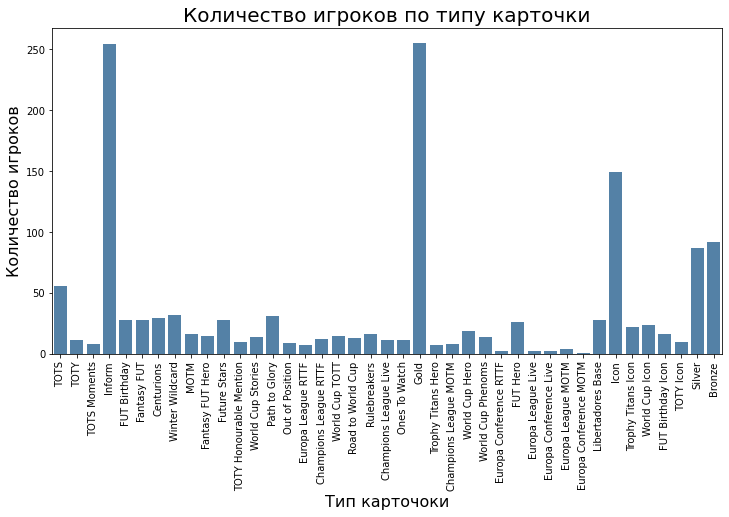

In [428]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Card Type', color='steelblue')
plt.title('Количество игроков по типу карточки', fontsize=20)
plt.xlabel('Тип карточоки', fontsize=16)
plt.ylabel('Количество игроков', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [429]:
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Загрузка базы данных по странам с их местоположением на карте
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [430]:
# Некоторые страны названы немного по-другому, поэтому поменяем
df['Nation'].replace('England', 'United Kingdom', inplace = True)
df['Nation'].replace('Scotland', 'United Kingdom', inplace = True)
df['Nation'].replace('Northern Ireland', 'United Kingdom', inplace = True)
df['Nation'].replace('Wales', 'United Kingdom', inplace = True)
df['Nation'].replace('United States', 'United States of America', inplace = True)

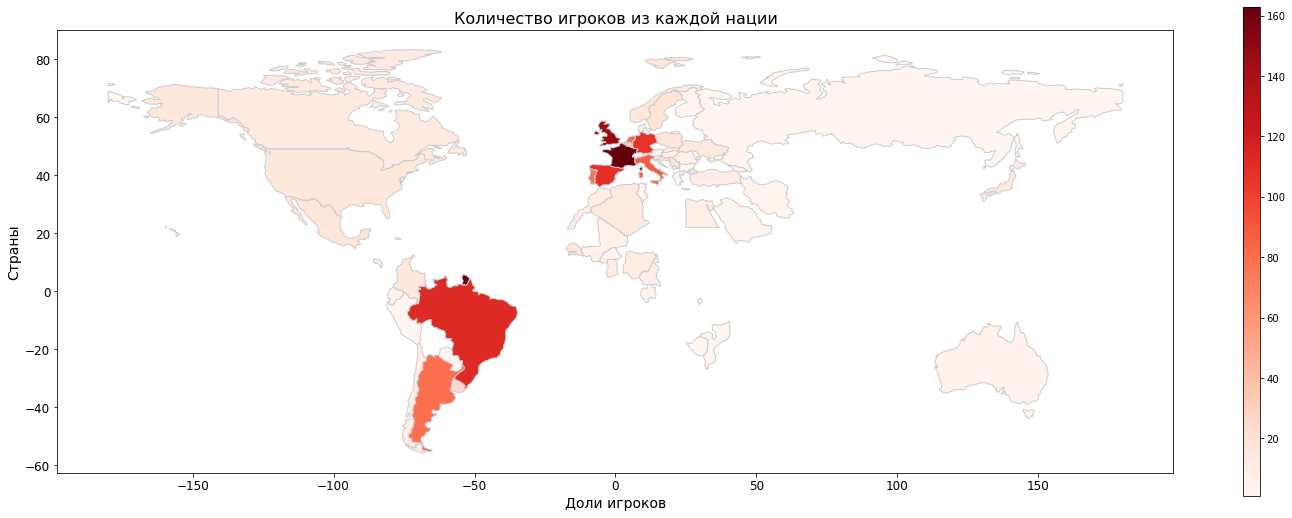

In [431]:
nation_counts = df['Nation'].value_counts() # Подсчет статистики по распределению национальностей игроков
merged = world.merge(nation_counts, left_on='name', right_index=True) # Объединение статистики по игрокам и расположения стран

# Построение карты
fig, ax = plt.subplots(figsize=(25, 15))
merged.plot(column='Nation', cmap='Reds', ax=ax, edgecolor='0.8', legend=True,
            legend_kwds={'shrink': 0.6, 'aspect': 30}) # Настройка размера легенды справа

# Обозначения на карте
ax.set_title('Количество игроков из каждой нации', fontsize=16)
ax.set_xlabel('Доли игроков', fontsize=14)
ax.set_ylabel('Страны', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

plt.show()


- Карта плохо показывает распределение игроков по странам в более мелком масштабе, к тому же некоторые стран отстутсвуют, так как мы запарсили игроков не из всех стран

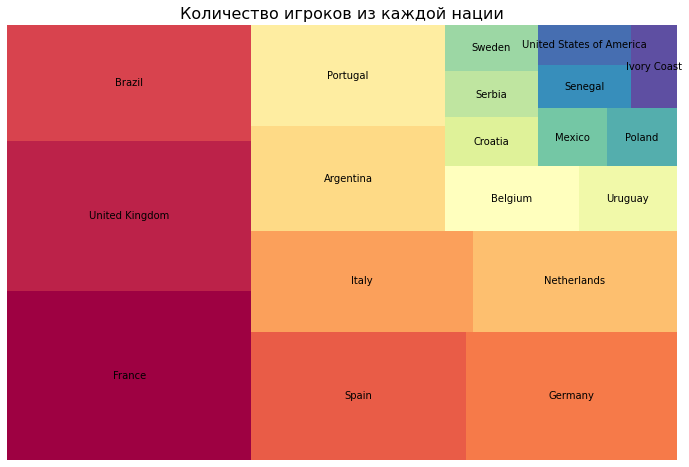

In [432]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

min_count = 15 # минимальное число игроков страны, при котором страна будет видна на карте
filtered_nation_counts = nation_counts[nation_counts >= min_count]

sizes = filtered_nation_counts.values # массив значений
labels = filtered_nation_counts.index # массив индексов
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels))) # палитра цветов

fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels,color=colors)

# Настройка внешнего вида
plt.axis('off')
plt.title('Количество игроков из каждой нации', fontsize=16)
plt.show()


In [433]:
import seaborn as sns

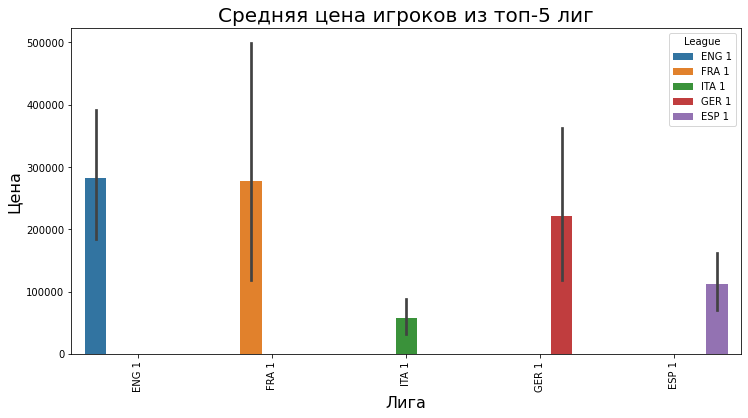

In [434]:
plt.figure(figsize=(12, 6))
sns.barplot(x='League', y='Price', hue='League', estimator= np.mean, data=df[df['League'].isin(['ENG 1', 'FRA 1', 'ITA 1', 'GER 1', 'ESP 1'])])
plt.title('Средняя цена игроков из топ-5 лиг', fontsize=20)
plt.xlabel('Лига', fontsize=16)
plt.ylabel('Цена', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [435]:
# Построим сводную таблицы средней стоимости игроков и количества игроков по каждой лиге и национальности
grouped_data = df.groupby(['League', 'Nation']).agg({'Price': ['mean', 'count']})
grouped_data.columns = ['Mean Price', 'Number Of Players']
grouped_data.sort_values(by = 'Number Of Players', ascending = False)

Mean Price  Number Of Players
League Nation                                          
GER 1  Germany         107475.000000                 72
ESP 1  Spain            54645.081967                 61
FRA 1  France          475554.464286                 56
ENG 1  United Kingdom  206479.347826                 46
ITA 1  Italy            58959.782609                 46
...                              ...                ...
GER 1  Iran             16750.000000                  1
       Ivory Coast      12750.000000                  1
       Norway            9300.000000                  1
       Poland           27750.000000                  1
WC     Uruguay          38250.000000                  1

[317 rows x 2 columns]

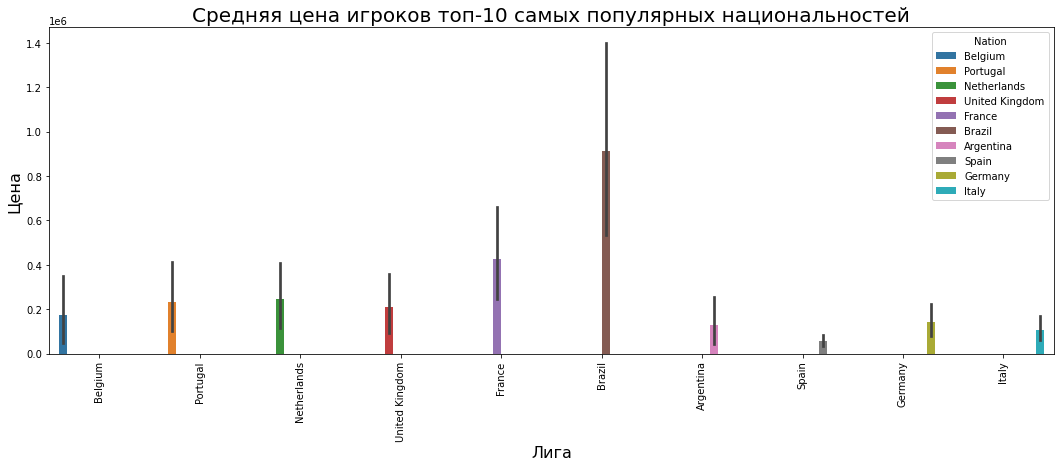

In [436]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Nation', y='Price', hue='Nation', estimator= np.mean, 
            data=df[(df['Nation'].isin(df['Nation'].value_counts().index[:10].to_list()))])
plt.title('Средняя цена игроков топ-10 самых популярных национальностей', fontsize=20)
plt.xlabel('Лига', fontsize=16)
plt.ylabel('Цена', fontsize=16)
plt.xticks(rotation=90)
plt.show()

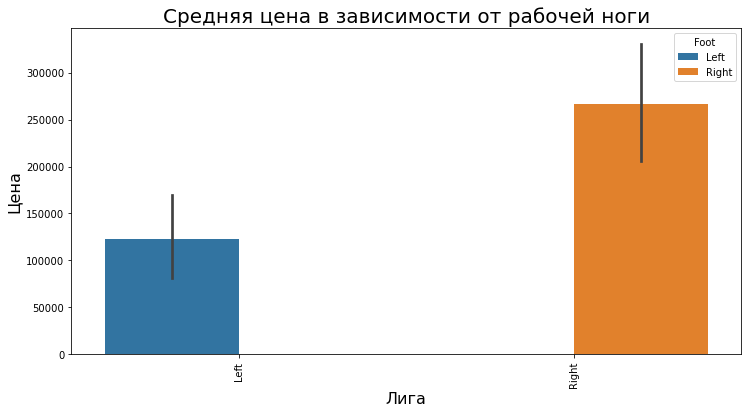

In [437]:
# Визуализация статистики по ведущей ноге у различных игроков
plt.figure(figsize=(12, 6))
sns.barplot(x='Foot', y='Price', hue='Foot', estimator=lambda x: sum(x)/len(x), data=df)
plt.title('Средняя цена в зависимости от рабочей ноги', fontsize=20)
plt.xlabel('Лига', fontsize=16)
plt.ylabel('Цена', fontsize=16)
plt.xticks(rotation=90)
plt.show()

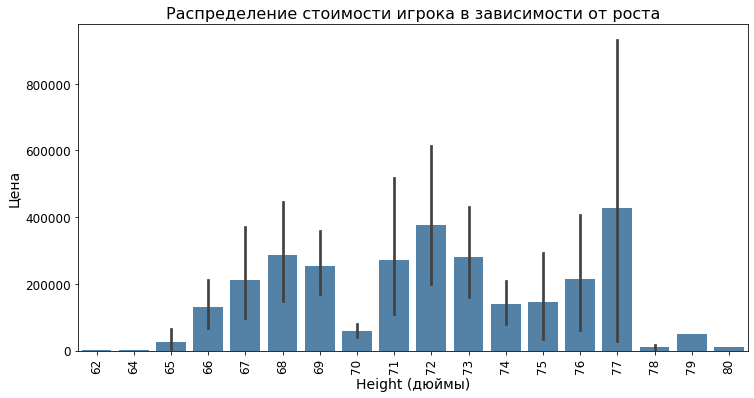

In [438]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Height', y = 'Price', color='steelblue', estimator = np.mean)
plt.title('Распределение стоимости игрока в зависимости от роста', fontsize=16)
plt.xlabel('Height (дюймы)', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

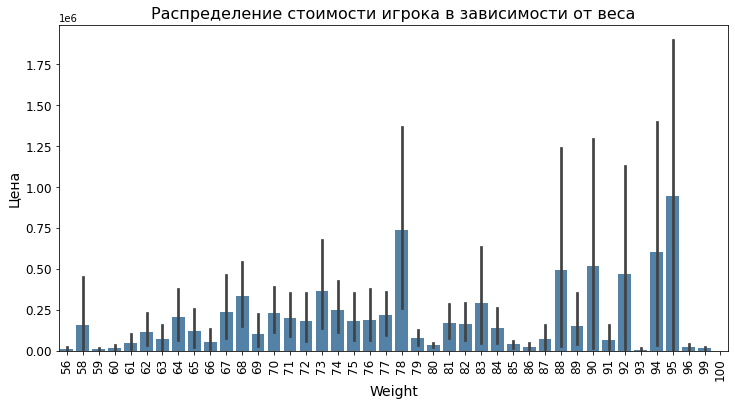

In [439]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Weight', y = 'Price', color='steelblue', estimator = np.mean)
plt.title('Распределение стоимости игрока в зависимости от веса', fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

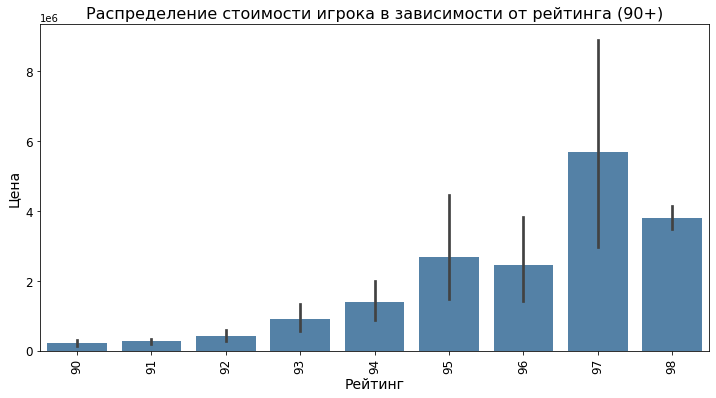

In [440]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['Rating'] >= 90], x='Rating', y = 'Price', color='steelblue', estimator = np.mean)
plt.title('Распределение стоимости игрока в зависимости от рейтинга (90+)', fontsize=16)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

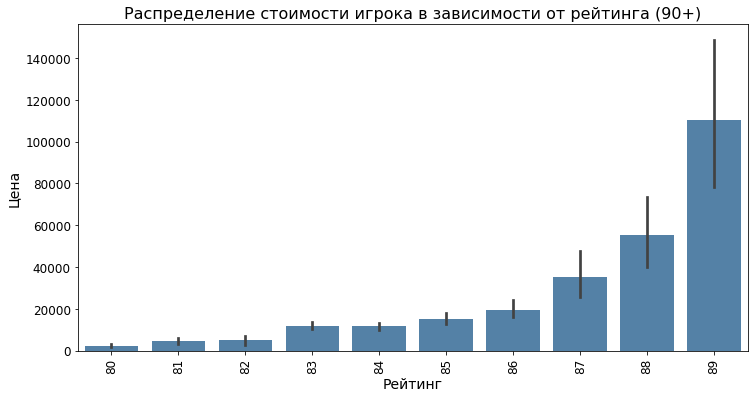

In [441]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df[(df['Rating'] < 90) & (df['Rating'] >= 80)], x='Rating', y = 'Price', color='steelblue', estimator = np.mean)
plt.title('Распределение стоимости игрока в зависимости от рейтинга (90+)', fontsize=16)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

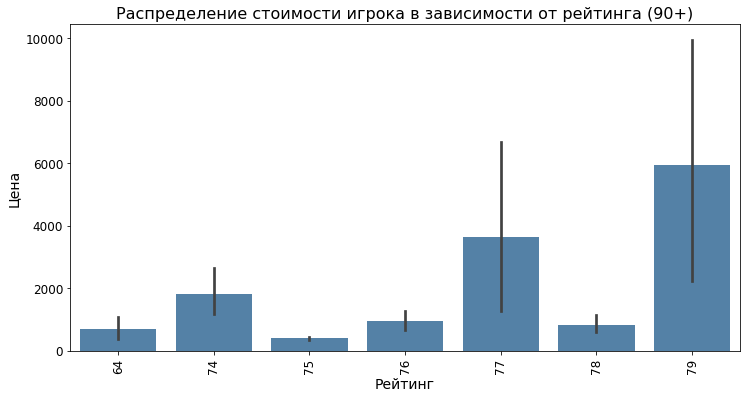

In [442]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['Rating'] < 80], x='Rating', y = 'Price', color='steelblue', estimator = np.mean)
plt.title('Распределение стоимости игрока в зависимости от рейтинга (90+)', fontsize=16)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

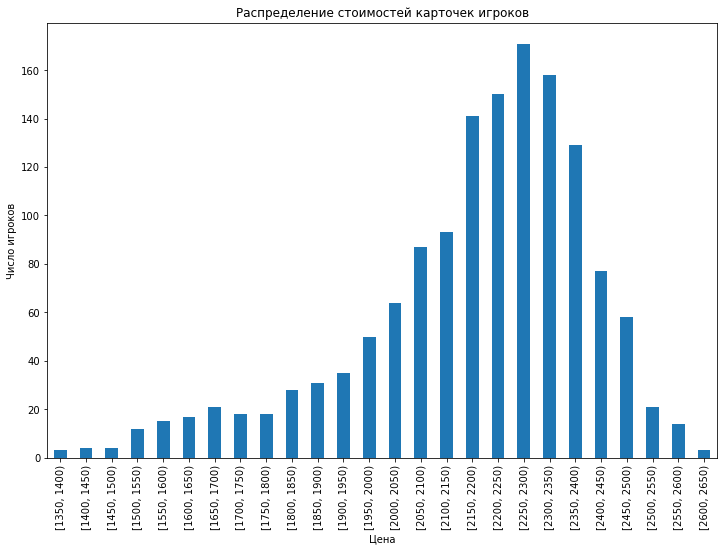

In [454]:
plt.figure(figsize=(12, 8))
counts_grouped_2 = pd.cut(df['Sum Of Stats'], bins=range(1350, 2700, 50), right=False)

counts_grouped_2.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Цена')
plt.ylabel('Число игроков')
plt.title('Распределение стоимостей карточек игроков')
plt.xticks(rotation=90)
plt.show()

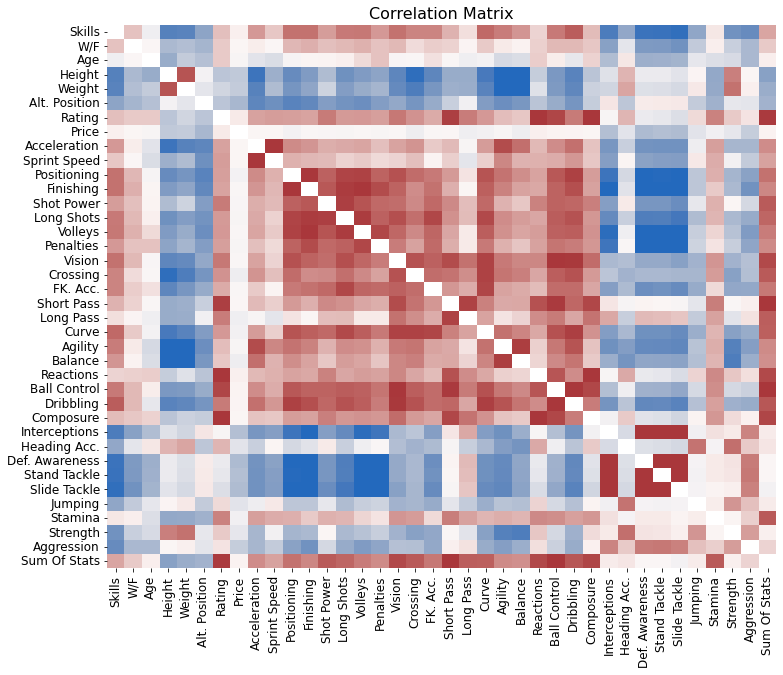

In [443]:
mask = df.corr()
np.fill_diagonal(mask.values, np.nan)
plt.figure(figsize=(12, 10))
sns.heatmap(mask, cmap='vlag', cbar=False, annot=False, robust = True)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Матрица корелляции дает хорошее общее представление о данных, но ее не очень удобно применять, так как на ней слишком много малозначимой информации

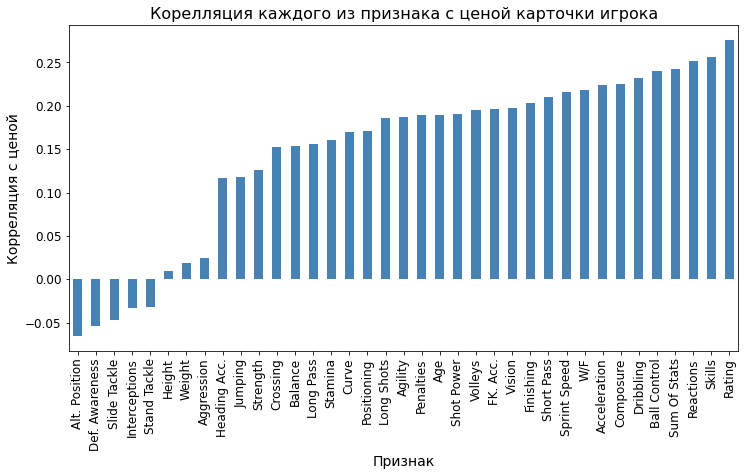

In [444]:
# Посчитаем корелляцию каждого признака с ценой карточки игрока
plt.figure(figsize=(12, 6))
correlation_with_price = df.corr()['Price'].drop('Price').sort_values()
correlation_with_price.plot(kind='bar', color='steelblue')
plt.title('Корелляция каждого из признака с ценой карточки игрока', fontsize=16)
plt.xlabel('Признак', fontsize=14)
plt.ylabel('Корреляция с ценой', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Кодирование данных

- Для дальнейшней работы с алгоритмами машинного обучения нам необходимо закодировать категориальные переменные
- В выборе между Label Encoding и One-hot-encoding был выбран метод One-hot-encoding, так как он более универсальный и не ранжирует признаки
- Наличие отдельного столбца под каждое из значений категориального признака позволяет алгоритму лучше работать с весами

In [445]:
df_initial = df.copy()

categorical_columns = ['Card Type', 'Nation', 'Club', 'League', 'W/R', 'Foot', 'Height', 'Weight', 'Body Type', 'Position', 'Alt. Position']
df_categorical_encoded = pd.get_dummies(df[categorical_columns])

# Объединение закодированных столбцов с исходным DataFrame
df_encoded = pd.concat([df_initial, df_categorical_encoded], axis=1)

# Удаление исходных категориальных столбцов
df_encoded.drop(categorical_columns, axis=1, inplace=True)


In [446]:
df_encoded

,Name,Skills,W/F,Age,Rating,Price,Acceleration,Sprint Speed,Positioning,Finishing,...,Position_CM,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,Erling Haaland,4,5,22,97,4270000,94,99,95,99,...,0,0,0,0,0,0,0,0,0,1
1,Kevin De Bruyne,4,5,31,97,1799000,86,83,92,89,...,1,0,0,0,0,0,0,0,0,0
2,Kevin De Bruyne,4,5,31,97,1950000,87,84,94,91,...,1,0,0,0,0,0,0,0,0,0
3,Mohamed Salah,5,3,30,96,1937000,95,97,98,99,...,0,0,0,0,0,0,0,1,0,0
4,Ruben Dias,2,4,25,96,575000,80,94,48,36,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,Magnus Lekven,2,4,34,64,10000,49,49,62,46,...,1,0,0,0,0,0,0,0,0,0
1790,Arda Kizildag,2,3,24,64,550,54,69,46,34,...,0,0,0,0,0,0,0,0,0,0
1791,Dane Scarlett,3,4,18,64,200,74,72,68,67,...,0,0,0,0,0,0,0,0,0,1
1792,Marvin Stefaniak,3,4,27,64,200,83,69,58,57,...,0,0,0,0,0,0,0,0,0,0
